In [26]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
%matplotlib inline

/Users/liviaalmada/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/Users/liviaalmada/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
conn = psycopg2.connect("dbname=taxi-fortaleza user=postgres")

In [71]:
curs = conn.cursor()

In [72]:
curs.execute("SELECT * FROM public.speed_observations where avg_speed_ms < 100 order by edge_id_gh")

In [73]:
curs.fetchone()

(0,
 datetime.datetime(2016, 6, 16, 9, 24, 39, 824000),
 40.3211590317907,
 1,
 33293)

In [74]:
x = curs.fetchall()

In [75]:
x

[(0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 729000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 736000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 743000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 750000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 756000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 763000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 770000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 777000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 783000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 790000),
  40.3211590317907,
  1,
  33293),
 (0,
  datetime.datetime(2016, 6, 16, 9, 24, 39, 722000),
  40.3211590

In [34]:
resample(x, n_samples=10, random_state=5)

[(48080,
  datetime.datetime(2016, 6, 1, 22, 34, 56, 302000),
  27.0587855587944,
  7038,
  7037),
 (44210,
  datetime.datetime(2016, 6, 1, 22, 38, 53, 708000),
  47.6873115016726,
  27882,
  27920),
 (48080,
  datetime.datetime(2016, 6, 1, 22, 34, 56, 298000),
  27.0587855587944,
  7038,
  7037),
 (44210,
  datetime.datetime(2016, 6, 1, 22, 38, 53, 708000),
  47.6873115016726,
  27882,
  27920),
 (44210,
  datetime.datetime(2016, 6, 1, 22, 38, 53, 711000),
  47.6873115016726,
  27882,
  27920),
 (48080,
  datetime.datetime(2016, 6, 1, 22, 34, 56, 302000),
  27.0587855587944,
  7038,
  7037),
 (44210,
  datetime.datetime(2016, 6, 1, 22, 38, 53, 708000),
  47.6873115016726,
  27882,
  27920),
 (44210,
  datetime.datetime(2016, 6, 1, 22, 38, 53, 708000),
  47.6873115016726,
  27882,
  27920),
 (44210,
  datetime.datetime(2016, 6, 1, 22, 38, 53, 711000),
  47.6873115016726,
  27882,
  27920),
 (48080,
  datetime.datetime(2016, 6, 1, 22, 34, 56, 298000),
  27.0587855587944,
  7038,
  7037)

In [79]:
df = pd.DataFrame(x, columns=['edge','date','speed','from','to'])

In [80]:
from sklearn.utils import resample

In [81]:
df.head()

,edge,date,speed,from,to
0,0,2016-06-16 09:24:39.729,40.321159,1,33293
1,0,2016-06-16 09:24:39.736,40.321159,1,33293
2,0,2016-06-16 09:24:39.743,40.321159,1,33293
3,0,2016-06-16 09:24:39.750,40.321159,1,33293
4,0,2016-06-16 09:24:39.756,40.321159,1,33293


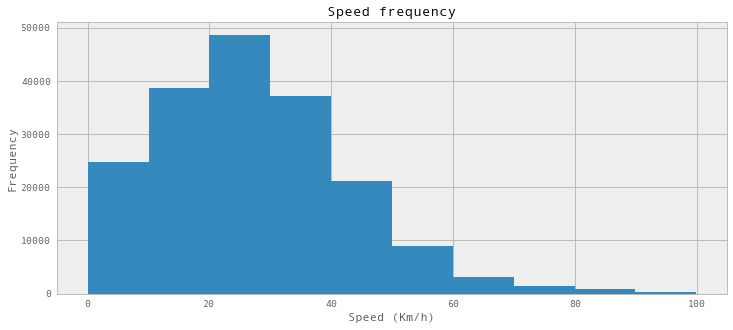

In [83]:
plt.hist(df.speed)
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

In [84]:
ids = df.edge.unique()

In [102]:
df[df['edge']==0]

,edge,date,speed,from,to
0,0,2016-06-16 09:24:39.729,40.321159,1,33293
1,0,2016-06-16 09:24:39.736,40.321159,1,33293
2,0,2016-06-16 09:24:39.743,40.321159,1,33293
3,0,2016-06-16 09:24:39.750,40.321159,1,33293
4,0,2016-06-16 09:24:39.756,40.321159,1,33293
5,0,2016-06-16 09:24:39.763,40.321159,1,33293
6,0,2016-06-16 09:24:39.770,40.321159,1,33293
7,0,2016-06-16 09:24:39.777,40.321159,1,33293
8,0,2016-06-16 09:24:39.783,40.321159,1,33293
9,0,2016-06-16 09:24:39.790,40.321159,1,33293


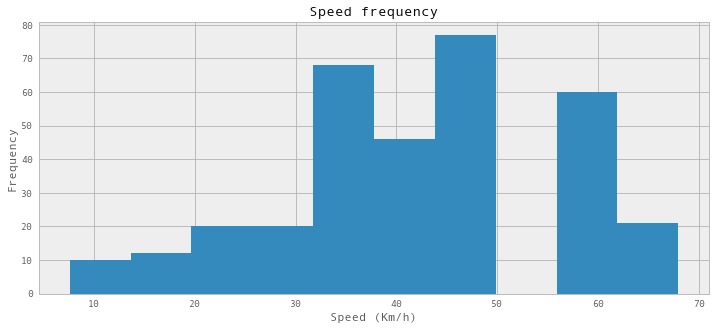

In [114]:
plt.hist(df[df['edge']==32532]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

/Users/liviaalmada/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


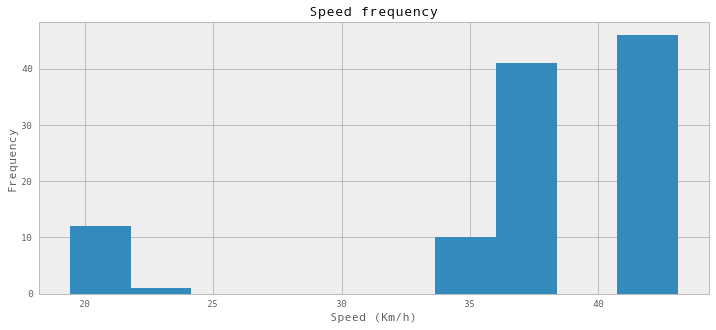

In [139]:
t1 = df[df['date'].dt.hour > 8][df['date'].dt.hour < 16]
plt.hist(t1[t1['edge']==32532]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

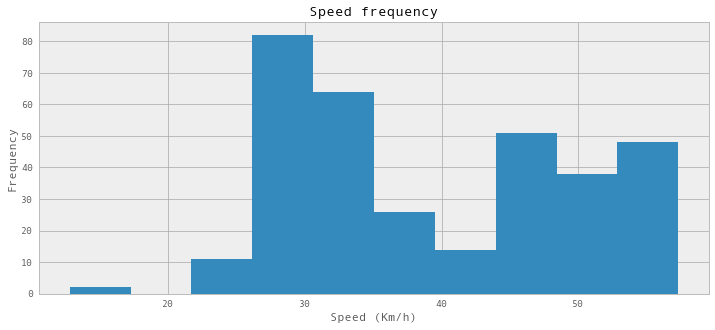

In [111]:
plt.hist(df[df['edge']==647]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

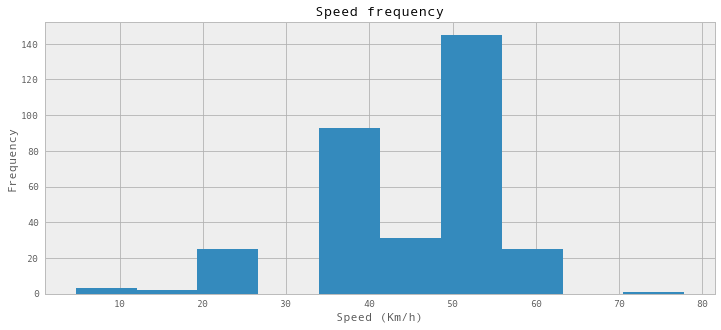

In [112]:
plt.hist(df[df['edge']==55940]['speed'])
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")

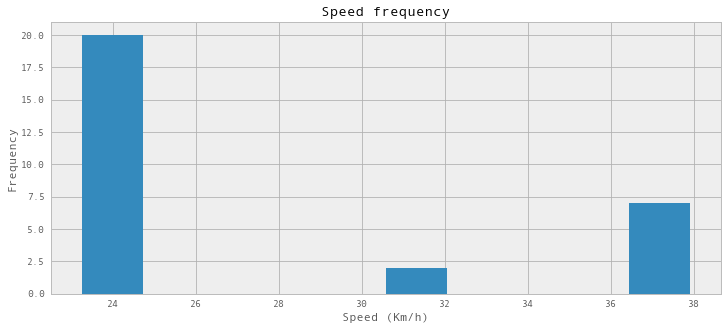

In [113]:
plt.hist(df[df['edge']==693]['speed']) #30 observações
plt.title("Speed frequency")
plt.xlabel("Speed (Km/h)")
plt.ylabel("Frequency")